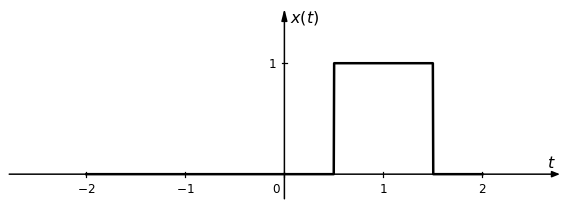

In [11]:
# 1. Usar todo junto (estilo actual)

from blockdiagrams import SignalPlotter

SignalPlotter("rect(t-1)", horiz_range=(-2, 2), vert_range=(0,1.2)).plot()

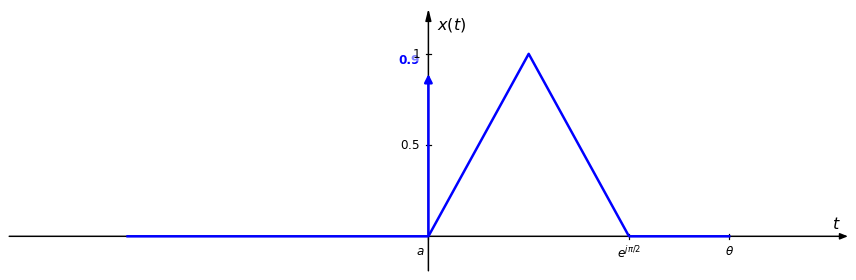

In [10]:
# 2. Usar modularmente

from blockdiagrams import SignalPlotter

p = SignalPlotter("0.9* delta(t) + tri(t - 1)", horiz_range=(-3, 3), figsize=(12,4), color='blue')
p.setup_axes()
p.draw_labels()
p.draw_function()
p.draw_impulses()
p.draw_ticks(xticks=[0, 2, 3], xtick_labels=['a','e^{j\\pi/2}', '\\theta'])
p.show()


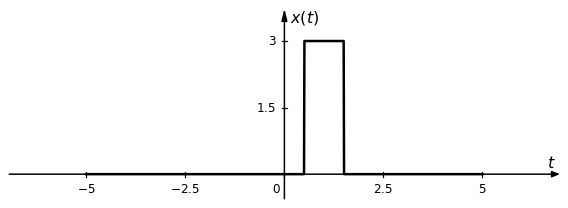

In [9]:
# 3. Usar funciones personalizadas

from blockdiagrams import SignalPlotter

SignalPlotter("3 * rect(t - 1)").plot()

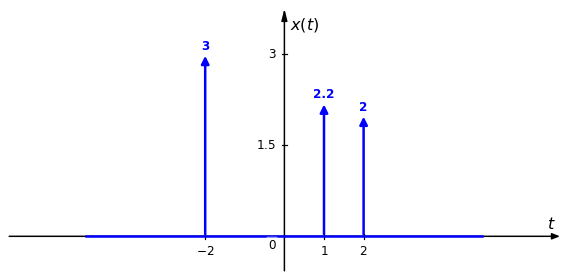

In [8]:
# 4. Impulsos con múltiples raíces

from blockdiagrams import SignalPlotter

SignalPlotter("delta(t/2-1) + 2.2*delta(t - 1) + 3*delta(t + 2)", color='blue', figsize=(8,4)).plot()


In [7]:
# 5. Guardar a archivo

from blockdiagrams import SignalPlotter

SignalPlotter("sin(t)*rect(t/2)", save_path="salida.png", show_plot=False).plot()


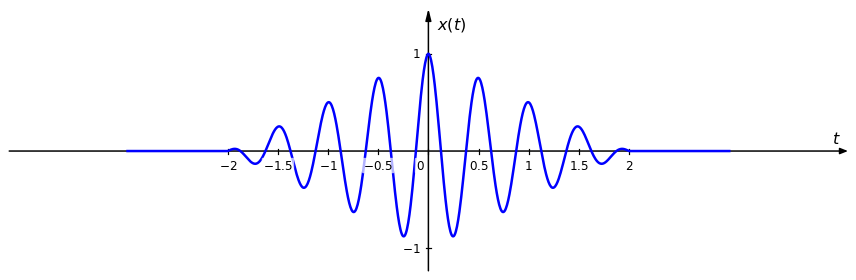

In [6]:
from blockdiagrams import SignalPlotter
import numpy as np

signal1 = SignalPlotter("cos(4 pi t)*tri(t/2)", alpha=0.7, horiz_range=[-3, 3], xticks=np.linspace(-2, 2, 9), color='blue', figsize=(12,4))
signal1.plot()


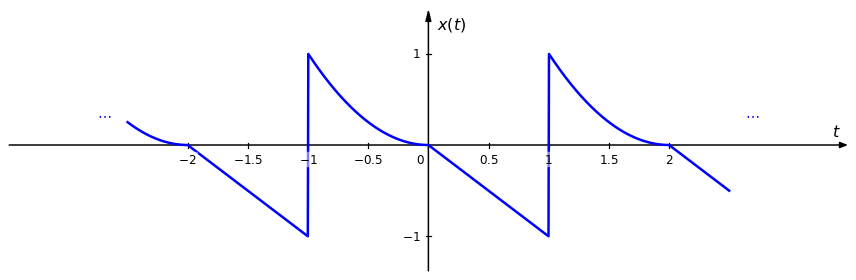

In [5]:
from blockdiagrams import SignalPlotter
import numpy as np

signal1 = SignalPlotter("pw((t**2, (t>-1) & (t<0)), (-t, (t>=0) & (t<1)), (0, True))", horiz_range=[-2.5, 2.5], xticks=np.linspace(-2, 2, 9), color='blue', figsize=(12,4), periodo=2)
signal1.plot()


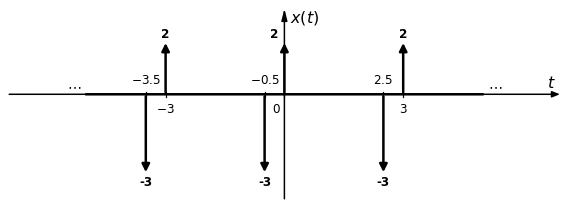

In [4]:
from blockdiagrams import SignalPlotter

SignalPlotter("x(t)=2*delta(t) - 3*delta(t+0.5)", yticks=None, periodo=3).plot()


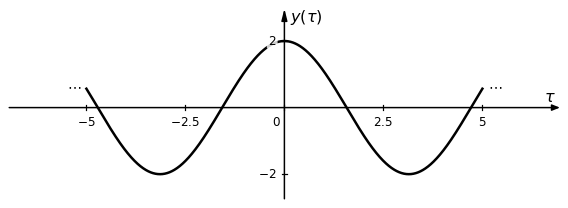

In [3]:
from blockdiagrams import SignalPlotter

signal1 = SignalPlotter(r'y(\tau)=2*cos(\tau)',alpha=0.8, xticks='auto')
signal1.plot()

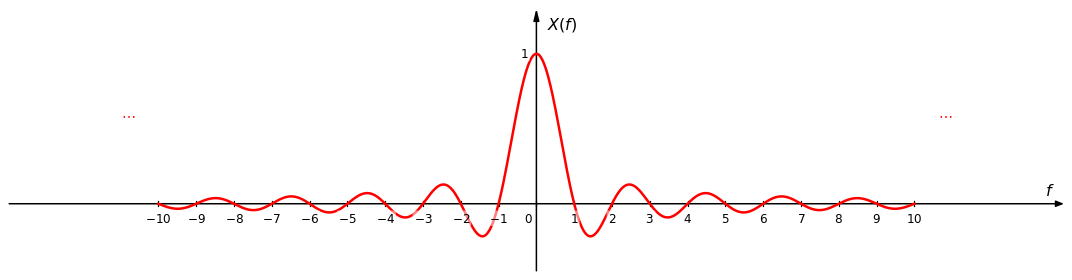

In [2]:
from blockdiagrams import SignalPlotter
import numpy as np

SignalPlotter("X(f)=sinc(f)", horiz_range=[-10, 10], xticks=np.linspace(-10, 10, 21), figsize=(15, 4), color='red').plot()

In [10]:
%matplotlib notebook
from blockdiagrams import SignalPlotter

sp = SignalPlotter("X(f)=sin(pi f)/(pi f)", horiz_range=(-10, 10), num_points=500)
sp.plot()

# Esta llamada devuelve el HTML con la animación embebida, que Jupyter muestra
sp.animate_signal(interval=10)


<IPython.core.display.Javascript object>

AttributeError: 'SignalPlotter' object has no attribute 'animate_signal'

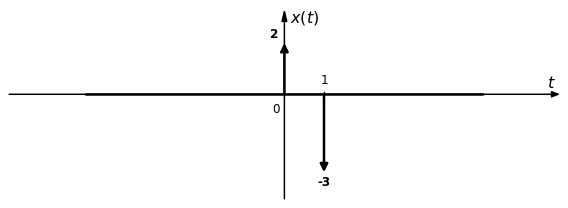

In [1]:
from blockdiagrams import SignalPlotter

SignalPlotter("x(t)=2*delta(t) - 3*delta(t-1)", periodo=None,
              yticks=[]).plot()

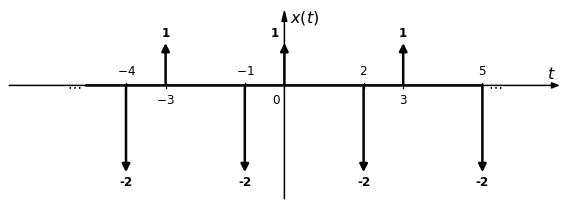

In [8]:
from blockdiagrams import SignalPlotter

SignalPlotter("x(t)=delta(t) - 2*delta(t-2)", yticks=None, periodo=3, horiz_range=(-5,5)).plot()

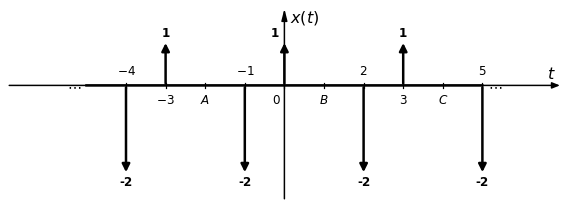

In [7]:
from blockdiagrams import SignalPlotter

SignalPlotter("x(t)=delta(t) - 2*delta(t-2)", periodo=3, horiz_range=(-5,5),
              xticks=[-2,1, 4], xtick_labels=['A','B','C'], yticks=[]).plot()

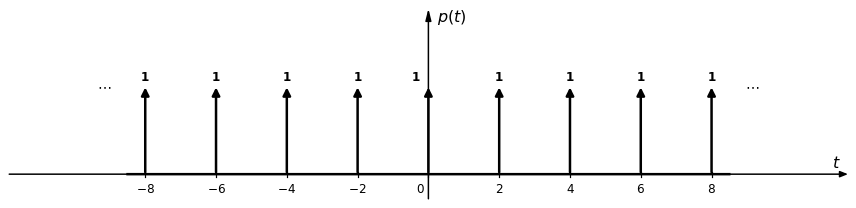

In [4]:
from blockdiagrams import SignalPlotter

SignalPlotter("p(t)=delta(t)", yticks=None, periodo=2, horiz_range=(-8.5,8.5), vert_range=[0,1.5], figsize=[12, 3]).plot()

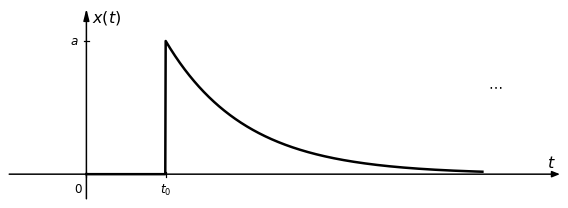

In [5]:
from blockdiagrams import SignalPlotter
import numpy as np

SignalPlotter("x(t)=exp(-(t-1))*u(t-1)", xticks=[0, 1], xtick_labels=[0,'t_0'], yticks=[1], ytick_labels=['a'], horiz_range=[0, 5]).plot()

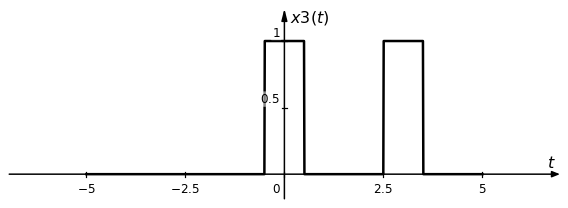

x1(t) =
-θ(t - 0.5) + θ(t + 0.5)

x2(t) =
-θ(t - 0.5) + θ(t + 0.5)

x3(t) =
θ(0.5 - t) - θ(-t - 0.5) - θ(t - 3.5) + θ(t - 2.5)



In [2]:
from blockdiagrams import SignalPlotter

sp = SignalPlotter(horiz_range=(-5, 5))
sp.add_signal("x1(t)=rect(t)")
sp.add_signal("x2(t)=x1(t)")
sp.add_signal("x3(t)=x2(-t)+x1(t-3)")
sp.plot("x3")

from sympy import pprint

for name, expr in sp.signal_defs.items():
    print(f"{name}(t) =")
    pprint(expr)
    print()

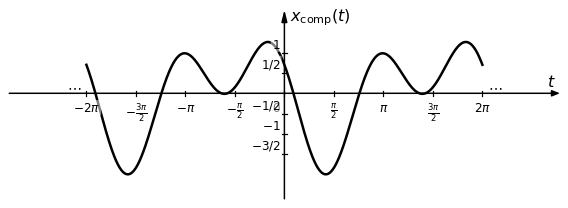

In [1]:
from blockdiagrams import SignalPlotter
from numpy import pi

sp = SignalPlotter(horiz_range=(-2*pi, 2*pi), pi_mode=True,xticks_delta=pi/2, fraction_ticks=True, yticks_delta=0.5)
sp.add_signal("x1(t)=sin(t)", label="x_{\\mathrm{base}}(t)")
sp.add_signal("x2(t)=x1(2*t+1)", label="x_{\\mathrm{esc}}(t)")
sp.add_signal("x3(t)=x2(-t)+x1(t-3)", label="x_{\\mathrm{comp}}(t)")
sp.plot("x3")

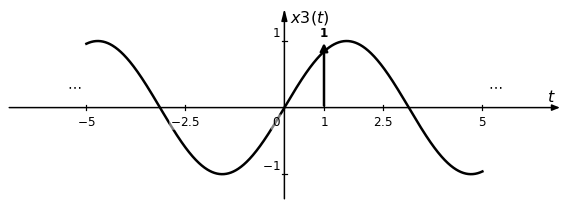

In [6]:
from blockdiagrams import SignalPlotter

sp = SignalPlotter(horiz_range=(-5, 5), xticks='auto',pi_mode=True)
sp.add_signal("x1(t)=sin(t)")
sp.add_signal("x2(t)=delta(t-1)")
sp.add_signal("x3(t)=x1(t)+x2(t)")
sp.plot("x3")

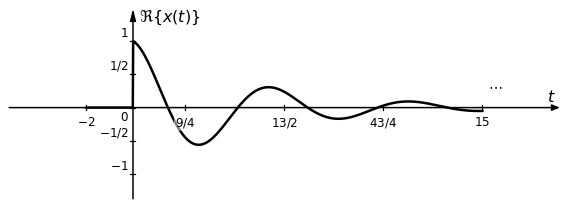

In [8]:
from blockdiagrams import SignalPlotter

sp = SignalPlotter(horiz_range=(-2, 15), vert_range=[-1, 1], fraction_ticks=True, yticks_delta=0.5)
sp.add_signal("x(t)=exp((-0.2+j*pi/3)*t)*u(t)")
sp.add_signal("x_re(t)=re(x(t))", label="\Re\{x(t)\}")
sp.add_signal("x_im(t)=im(x(t))", label="\Im\{x(t)\}")
sp.add_signal("x_abs(t)=abs(x(t))", label="|x(t)|")
sp.add_signal("x_arg(t)=arg(x(t))", label="\\angle\{x(t)\}")

sp.plot("x_re")
# sp.plot("x_im")
# sp.plot("x_abs")
# sp.plot("x_arg")


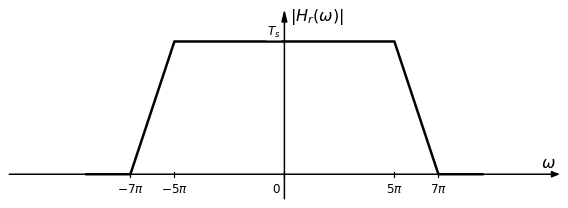

In [2]:
from blockdiagrams import SignalPlotter
from numpy import pi

sp = SignalPlotter(
    horiz_range=(-9*pi, 9*pi),
    yticks=[0, 1/5],
    ytick_labels=['0', 'T_s'],
    xticks=[-7*pi, -5*pi, 0, 5*pi, 7*pi],
    pi_mode=True
)
sp.add_signal("H_r(\omega)=exp(-j*\omega/4) * pw((1/5, abs(\omega) <= 5*pi), (1/(10*pi)*(7*pi-abs(\omega)), (abs(\omega) > 5*pi) & (abs(\omega) < 7*pi)), (0, True))")
sp.add_signal("H_re(\omega)=re(H_r(\omega))", label="\Re\{H_r(\omega)\}")
sp.add_signal("H_im(\omega)=im(H_r(\omega))", label="\Im\{H_r(\omega)\}")
sp.add_signal("H_abs(\omega)=abs(H_r(\omega))", label="|H_r(\omega)|")
sp.add_signal("H_arg(\omega)=arg(H_r(\omega))", label="\\angle\{H_r(\omega)\}")

sp.plot("H_abs")

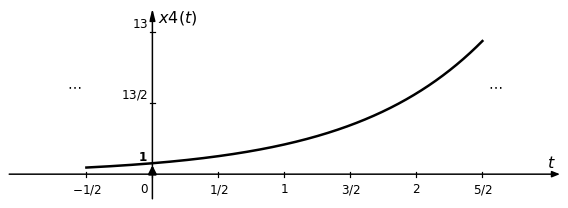

In [17]:
from blockdiagrams import SignalPlotter

sp = SignalPlotter(horiz_range=(-0.5, 2.5), fraction_ticks=True, xticks_delta=1/2)
sp.add_signal("x1(t)=exp(t)")
sp.add_signal('x2(t)=delta(t)', period=1)
sp.add_signal('x3(t)=x1(t)*x2(t)')
sp.add_signal('x4(t)=x3(t)+x1(t)')

sp.plot('x4')

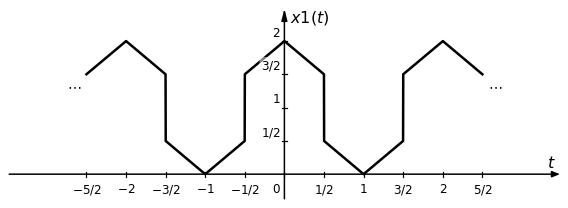

In [ ]:
from blockdiagrams import SignalPlotter

sp = SignalPlotter(horiz_range=(-2.5, 2.5), 
                   vert_range=(0, 2),
                   fraction_ticks=True, 
                   xticks_delta=1/2,
                   yticks_delta=0.5,)
sp.add_signal("x1(t)=tri(t)", period=2)
sp.add_signal('x2(t)=rect(t)', period=2)
sp.add_signal('x3(t)=x1(t)+x2(t)')
sp.plot('x3')

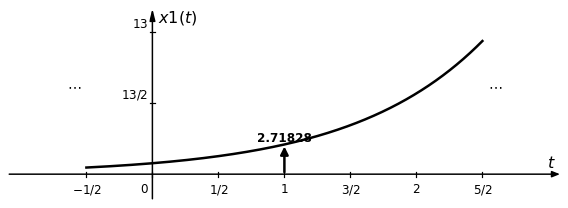

In [ ]:
from blockdiagrams import SignalPlotter

sp = SignalPlotter(horiz_range=(-0.5, 2.5), fraction_ticks=True, xticks_delta=1/2)
sp.add_signal("x1(t)=exp(t)*(1+delta(t-1))")
sp.plot('x1')

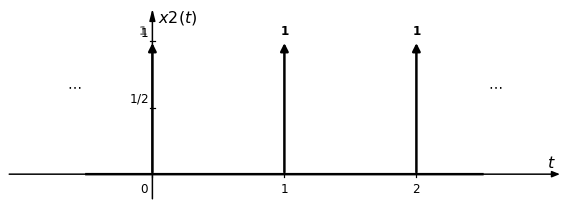

In [2]:
from blockdiagrams import SignalPlotter

sp = SignalPlotter(horiz_range=(-0.5, 2.5), fraction_ticks=True, xticks_delta=1)
sp.add_signal("x2(t)=delta(t)", period=1)
sp.plot("x2")